## HW2, due March 3rd by end of day.
### Submit one ipynb in moodle, name your file HW2.firstname.lastname.ipynb

### Task 1: build a CNN that can achieve accuracy >= 99.2% on test data for the mnist digit dataset.
- Plot train and test accuracy vs epoch. Also print out max of test accuracy
- Comparing your CNN and the multiple-layer neural network you experimented in HW1, what, in your opinion, help the CNN to obtain a better accuracy?

(If your test accuracy cannot reach 99.2%, for each 0.1% below 99.2%, you lose 1 point.)

### Task 2: try a mini-vgg net on cifar-10 dataset.
Download cifar-10 from https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

Unzip and extract files into a directory named "cifar-10-batches-py".

Implement a mini-vgg net that has the following configuration:

(conv_3x3x32, conv_3x3x32, maxpool_2x2, \*, conv_3x3x64, conv_3x3x64, maxpool_2x2, \*, fc, \*, softmax)

fc = fully connected, i.e., dense layer in keras.
softmax = dense layer with softmax activation.
And you can add optional dropout layers at places indicated by '\*'. Report the following:

- How long for it to train 10 epoches?
- Plot both training and testing accuracy vs epoch. What is the best test accuracy you can achieve?

(If your computer is powerful enough, you should run enough training epoches until the training accuracy levels. Otherwise, run training overnight.)

## A simple CNN example on cifar-10 data

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cPickle
def load_cifar_data():
    X = []
    y = []
    for i in range(1, 6):
        f = open('cifar-10-batches-py/data_batch_%i' % i, 'rb')
        data = cPickle.load(f)
        f.close()
        X.append(data['data'])
        y.extend(data['labels'])
    X = np.vstack(X)

    f = open('cifar-10-batches-py/test_batch', 'rb')
    data = cPickle.load(f)
    f.close()
    Xt = data['data']
    yt = data['labels']
    
    return X.reshape((-1, 3, 32, 32))/255., np.array(y)[:, None], Xt.reshape((-1, 3, 32, 32))/255., np.array(yt)[:, None]

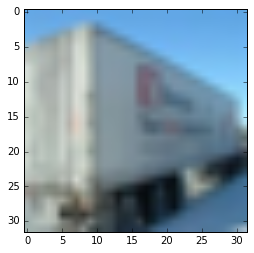

In [3]:
X, y, Xt, yt = load_cifar_data()
imshow(np.transpose(X[15], [1, 2, 0]))

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D

Using TensorFlow backend.


In [5]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(3, 32, 32)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
h = model.fit(X, y, batch_size=100, nb_epoch=20, validation_data=(Xt, yt))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 9s - loss: 1.5262 - acc: 0.4573 - val_loss: 1.3065 - val_acc: 0.5358
Epoch 2/20
50000/50000 [==============================] - 8s - loss: 1.2201 - acc: 0.5715 - val_loss: 1.2379 - val_acc: 0.5652
Epoch 3/20
50000/50000 [==============================] - 8s - loss: 1.1022 - acc: 0.6171 - val_loss: 1.1072 - val_acc: 0.6113
Epoch 4/20
50000/50000 [==============================] - 8s - loss: 1.0138 - acc: 0.6457 - val_loss: 1.0840 - val_acc: 0.6230
Epoch 5/20
50000/50000 [==============================] - 8s - loss: 0.9433 - acc: 0.6721 - val_loss: 1.0844 - val_acc: 0.6249
Epoch 6/20
50000/50000 [==============================] - 8s - loss: 0.8786 - acc: 0.6947 - val_loss: 1.0512 - val_acc: 0.6354
Epoch 7/20
50000/50000 [==============================] - 8s - loss: 0.8237 - acc: 0.7124 - val_loss: 0.9938 - val_acc: 0.6586
Epoch 8/20
50000/50000 [==============================] - 8s 

0.908040009975 0.666599979997 8


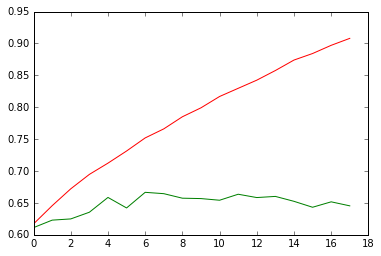

In [7]:
pt = h.history['acc']
pv = h.history['val_acc']
plot(pt[2:], 'r')
plot(pv[2:], 'g')
print np.max(pt), np.max(pv), np.argmax(pv)